<a href="https://colab.research.google.com/github/MobileApplicationBeraldi/Queues/blob/main/TTTQLEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

all:	 19683
valid:	 8707
tran:	 6617
term:	 2090
win 1:	 1029 
win 2:	 1029
True


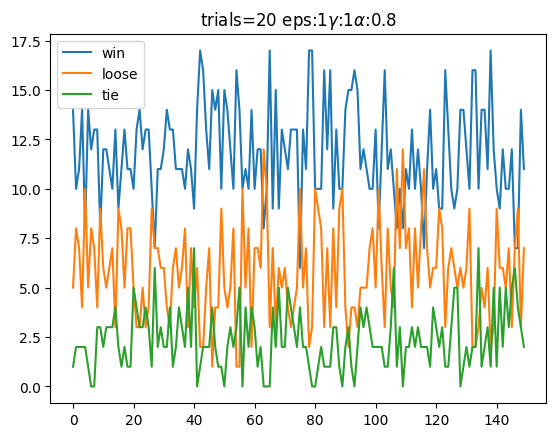

In [10]:
import itertools

symbols = [0, 1, 2]
all_states = list(itertools.product(symbols, repeat=9))

def is_tie_state(state):
  return state.count(0)==0

def is_valid_state(state):
    VERBOSE = False
    x_count = state.count(1)
    o_count = state.count(2)
    # Regole 1 e 2
    if not (x_count == o_count or x_count == o_count + 1 or o_count == x_count + 1):
        VERBOSE and print('fail')
        return False

    # return True
    rows = [state[i:i + 3] for i in range(0, 9, 3)]
    cols = [state[i::3] for i in range(3)]
    diagonals = [[state[0], state[4], state[8]], [state[2], state[4], state[6]]]
    totrow1 = 0;totcol1=0
    totrow2 = 0;totcol2=0
    for line in rows:
        if line.count(1) == 3: totrow1 = totrow1 + 1
        if line.count(2) == 3: totrow2 = totrow2 + 1

    for line in cols:
        if line.count(1) == 3: totcol1 = totcol1 + 1
        if line.count(2) == 3: totcol2 = totcol2 + 1

    if totrow1 + totrow2+totcol1+totcol2 > 1:
        VERBOSE and print('fail 2')
        return False
    return True


def is_terminal_state(state):
    rows = [state[i:i + 3] for i in range(0, 9, 3)]
    cols = [state[i::3] for i in range(3)]
    diagonals = [[state[0], state[4], state[8]], [state[2], state[4], state[6]]]
    if state.count(0) == 0: return True
    for line in rows + cols + diagonals:
        if line.count(1) == 3 or line.count(2) == 3: return True
    return False


def is_win_state(state, who):
    rows = [state[i:i + 3] for i in range(0, 9, 3)]
    cols = [state[i::3] for i in range(3)]
    diagonals = [[state[0], state[4], state[8]], [state[2], state[4], state[6]]]
    for line in rows + cols + diagonals:
        if line.count(who) == 3: return True
    return False

valid_states = [state for state in all_states if is_valid_state(state)]
terminal_states = [state for state in valid_states if is_terminal_state(state)]
win_1_states = [state for state in terminal_states if is_win_state(state,1)]
loose_1_states = [state for state in terminal_states if is_win_state(state,2)]
transient_states = list(set(valid_states)-set(terminal_states))
print('all:\t',len(all_states))
print('valid:\t',len(valid_states))
print('tran:\t',len(transient_states))
print('term:\t',len(terminal_states))
print('win 1:\t',len(win_1_states),'\nwin 2:\t',len(loose_1_states))

Q = {}

initValue=0
noPossible=-2
for s in all_states: Q[s] = [initValue] * 9


def Episode(epsilon=0.5):
  #Run a game until it ends
  import numpy as np
  import random
  VERBOSE = False
  s=(0,0,0,0,0,0,0,0,0)
  history=[]
  while (True):
    #Agent moves
    #1. check possible actions, set no possible for not free places
    a=[]
    b=[]
    for i in range(9):
      if s[i]!=0: Q[s][i]=noPossible

    #2.select the maximum utility action
    if random.random()>epsilon:
      a = np.argwhere(Q[s] == np.max(Q[s]))#get maximum from Q table
      a = a.reshape((1,len(a)))[0]#Reshaspe as a vector
      a = np.random.choice(a) #picks a value at random
    else:
      VERBOSE and print('RANDOM')
      for i in range(9):
        if s[i]==0: b.append(i)
      a = np.random.choice(b) #picks a value at random

    #3.  move
    history.append((s,a))
    ss=list(s);ss[a]=1;s=tuple(ss)


    #4. check termination
    #print('AGENT MOVE',a,s,'END?',s in set(terminal_states))
    if is_win_state(s,1): return (1,history)
    if is_win_state(s,2): return (-1,history)
    if s.count(0)==0: return (0,history)

    #ENV MOVE AT RANDOM
    a=[]
    for i in range(9):
      if s[i]==0: a.append(i)

    if len(a)==0:
      print('a=0 s',s,s in set(terminal_states))
      input('ERROR...')

    a=np.random.choice(a);ss=list(s);ss[a]=2;s=tuple(ss)

    #a = find_best_move(s);ss=list(s);ss[a]=2;s=tuple(ss)


    if is_win_state(s,1): return (1,history)
    if is_win_state(s,2): return (-1,history)
    if s.count(0)==0: return (0,history)
    #print('ENV MOVE',a,s)

    #Env moves



  #Qtable update

test=(1, 2, 2, 1, 2, 2, 1, 1, 1)
print(is_terminal_state(s))


def Epoch(trials=20,eps=1,alpha=0.5,gamma=1):
  import numpy as np
  VERBOSE = False
  win=0
  tie=0
  loose=0
  for i in range(trials):
    G,h=Episode(epsilon=eps)
    if (G==1): win=win+1
    if (G==-1): loose=loose+1
    if (G==0): tie=tie+1
    VERBOSE and print('***EPISODE***',G)
    VERBOSE and print(h)
    # for d in h: print(d)

    #update the last state before the end of the episode
    s,a=h[len(h)-1]
    Q[s][a]=G

    for i in range(len(h)-1): #LEARNING ...
      s,a=h[i] #the action a taken in state s
      s_next=h[i+1][0]#moved to state s_next

      Q[s][a]=Q[s][a]+alpha*(gamma*np.max(Q[s_next])-Q[s][a])


      VERBOSE and print(s,a,'-->',s_next,np.max(Q[s_next]))
      VERBOSE and print(np.max(Q[s_next]))

  return[win,loose,tie]



import matplotlib.pyplot as plt
import numpy as np
Y=[]
Ywin=[]
Ytie=[]
Yloose=[]
X=[]
trials=20;eps=1;gamma=1;alpha=0.8
for i in range(150):
  r = Epoch(trials=trials,eps=eps,gamma=gamma,alpha=alpha)#print(r)
  Y.append(r)
  X.append(i)
  Ywin.append(r[0])
  Yloose.append(r[1])
  Ytie.append(r[2])

plt.title('trials='+str(trials)+' eps:'+str(eps)+'$\gamma$:'+str(gamma)+r'$\alpha$:'+str(alpha))
plt.plot(X, Ywin, label='win')
plt.plot(X, Yloose, label='loose')
plt.plot(X, Ytie, label='tie')
plt.legend()
plt.show()